<a href="https://colab.research.google.com/github/egorssed/Simulation-based_Inference/blob/master/Notebooks/colab/Test_Deeplenstronomy_with_MRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
# Change to mount '/content/drive/My Drive/Fermilab/'
drive.mount('/content/drive')
Folder='/content/drive/MyDrive/Fermilab/'

!pip install sbi --quiet
!pip install deeplenstronomy==0.0.2.0 --quiet
!pip install lenstronomy --quiet
!pip install deeplenstronomy --quiet
!pip install getdist --quiet
#we also do this because of some compatibility issues with SBI
!pip uninstall matplotlib -y
!pip install matplotlib==3.1.3

!pip install git+https://github.com/sibirrer/fastell4py.git

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

!pip install tensorflow==2.4.1
import tensorflow as tf

# import main simulation class of lenstronomy
import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image

Mounted at /content/drive
     |████████████████████████████████| 208 kB 4.3 MB/s 
     |████████████████████████████████| 713 kB 42.8 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 3.4 MB 8.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 596 kB 49.7 MB/s 
     |████████████████████████████████| 829 kB 45.8 MB/s 
     |████████████████████████████████| 11.2 MB 35.1 MB/s 
     |████████████████████████████████| 895 kB 58.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 777 kB 4.3 MB/s 
Found existing installation: matplotlib 3.5.1
Uninstalling matplo

  Cloning https://github.com/sibirrer/fastell4py.git to /tmp/pip-req-build-k4egwyao
  Running command git clone -q https://github.com/sibirrer/fastell4py.git /tmp/pip-req-build-k4egwyao
  Created wheel for fastell4py: filename=fastell4py-0.1.0-cp37-cp37m-linux_x86_64.whl size=205877 sha256=4d8bbc6887b83369fb82ad898ad131d8e232e30bc11abd23a216c6ee8c2d9683
  Stored in directory: /tmp/pip-ephem-wheel-cache-rgvhudef/wheels/1c/f6/b7/0949bea0537d786e3bd69db6e13e8cd4e4e737437cfad37874
Successfully built fastell4py
     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 3.8 MB 37.2 MB/s 
     |████████████████████████████████| 14.8 MB 44.5 MB/s 
     |████████████████████████████████| 132 kB 47.9 MB/s 
     |████████████████████████████████| 2.9 MB 42.9 MB/s 
     |████████████████████████████████| 462 kB 38.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=a2863da874eeab02e00e35e2c6375bab6c58a352c770

# Test functionality of deeplenstronomy

In [111]:
path_Config=Folder+'Data/Config_files_SLACS_alike/'
dataset_sample=dl.make_dataset(path_Config+'Lenses_Park2021_HST.yaml',return_planes=True)
data_images=dataset_Park_SLACS.CONFIGURATION_1_images[:,0]
data_lens_lights=dataset_Park_SLACS.CONFIGURATION_1_planes[:,0,0]
data_source_lights=dataset_Park_SLACS.CONFIGURATION_1_planes[:,1,0]
data_noise=data_images-data_lens_lights-data_source_lights

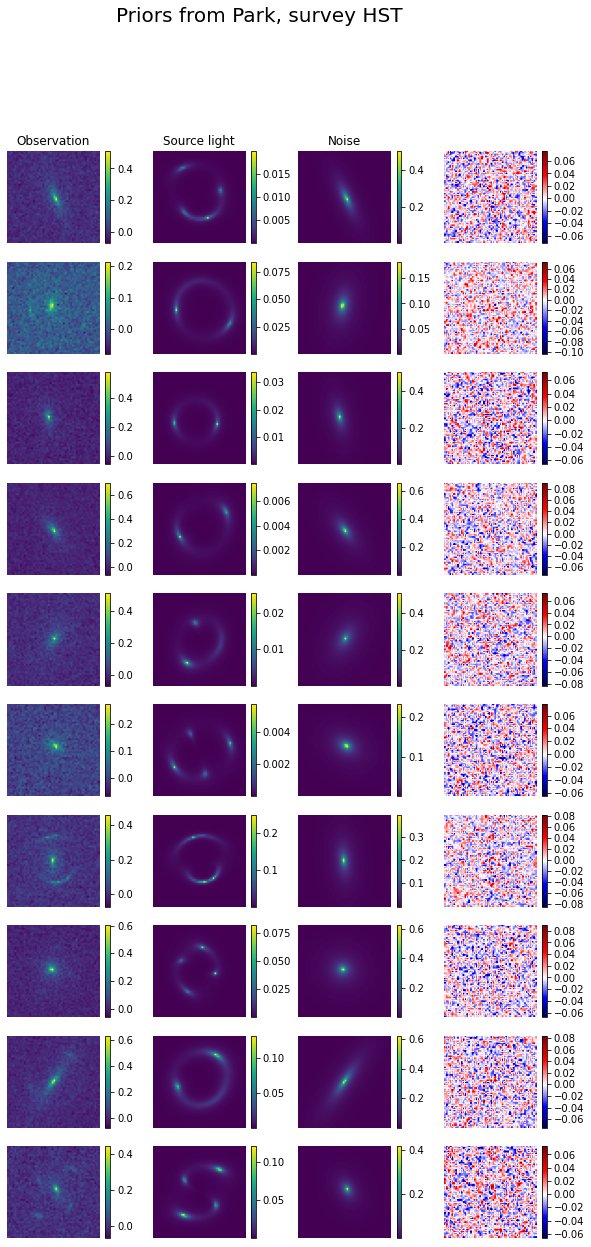

In [80]:
fig,ax=plt.subplots(10,4,figsize=(10,20))

for i in range(10):
  img_arr=[]
  img_arr+=[ax[i,0].imshow(data_images[i])]
  img_arr+=[ax[i,1].imshow(data_source_lights[i])]
  img_arr+=[ax[i,2].imshow(data_lens_lights[i])]
  img_arr+=[ax[i,3].imshow(data_noise[i],cmap='seismic',norm=mpl.colors.TwoSlopeNorm(0))]
  for j in range(4):
    ax[i,j].axis('off')
    fig.colorbar(img_arr[j],ax=ax[i,j],fraction=0.045)

ax[0,0].set_title('Observation')
ax[0,1].set_title('Source light')
ax[0,2].set_title('Lens light')
ax[0,2].set_title('Noise')

fig.suptitle('Priors from Park, survey HST',fontsize=20)
plt.show()

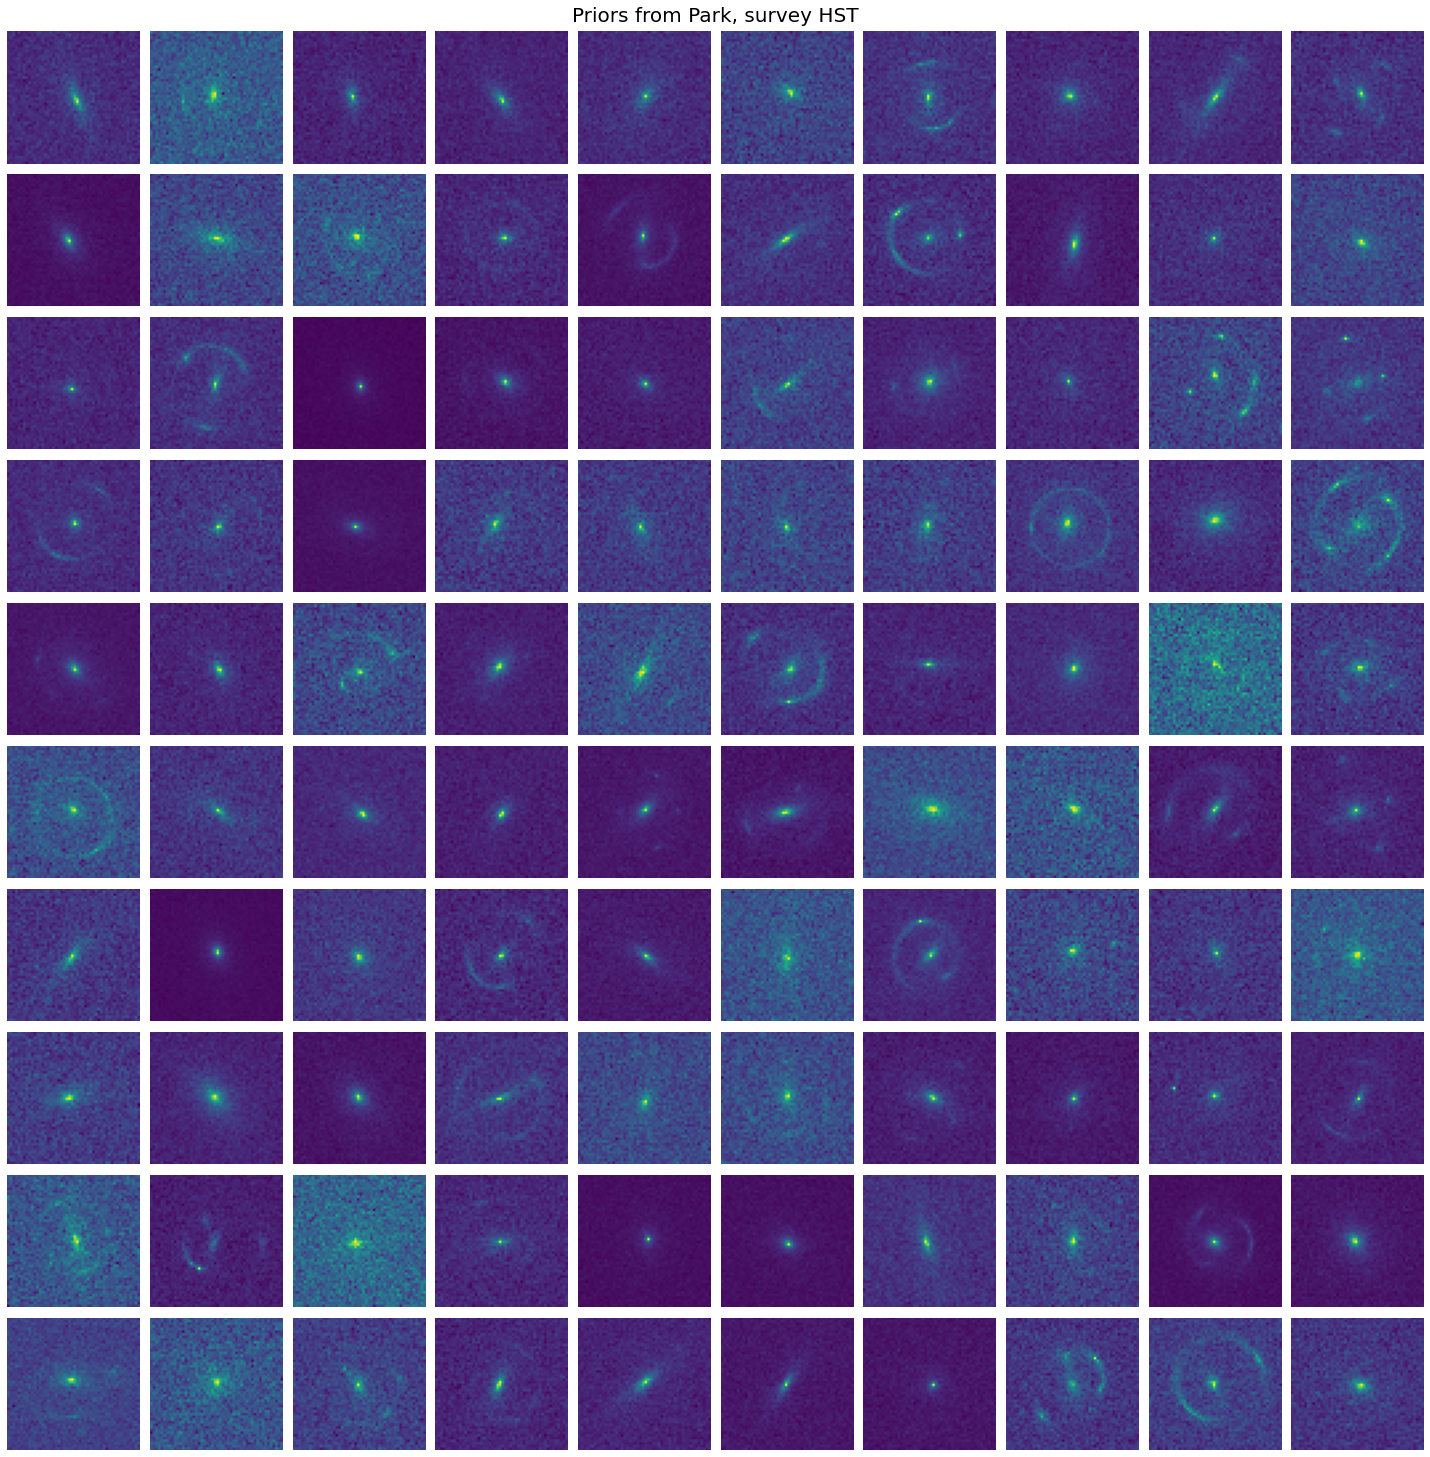

In [73]:
fig,ax=plt.subplots(10,10,figsize=(20,20))

for i in range(10):
    for j in range(10):
        ax[i,j].imshow(data_images[i*10+j])
        ax[i,j].axis('off')

fig.suptitle('Priors from Park, survey HST',fontsize=20,y=1.01)
plt.tight_layout()
plt.show()

Above SNR: 694
Number of images: 1000


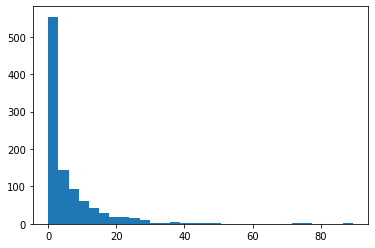

In [94]:
SNRs=data_source_lights.max(axis=(1,2))/data_noise.std(axis=(1,2))
plt.hist(SNRs,bins=30)
print('Above SNR: %d'%((SNRs>1).sum()))
print('Number of images: %d'%(len(SNRs)))
plt.show()

In [99]:
data_source_lights_masks=np.array([(data_source_lights[i]>data_noise[i].std()).astype(int) for i in range(len(data_source_lights))])
data_lens_lights_masks=np.array([2*(data_lens_lights[i]>data_noise[i].std()).astype(int) for i in range(len(data_lens_lights))])

data_images_masks=data_source_lights_masks+data_lens_lights_masks
# Correct for intersection
data_images_masks[data_images_masks==3]=2

# Generate dataset

In [2]:
# TODO: find in MRCNN.utils what shape should have mask for several classes 

In [ ]:
path_Config=Folder+'Data/Config_files_SLACS_alike/'

data_images=np.zeros((10000,50,50,1))
data_masks=np.zeros((10000,50,50))

i=0
sample_size=1000
while i<10:
  try:
    dataset_sample=dl.make_dataset(path_Config+'Lenses_Park2021_HST.yaml',return_planes=True)
    mock_images=dataset_sample.CONFIGURATION_1_images[:,0,:,:]
    
    lens_lights=dataset_sample.CONFIGURATION_1_planes[:,0,0]
    source_lights=dataset_sample.CONFIGURATION_1_planes[:,1,0]
    noise_images=mock_images-lens_lights-source_lights

    # Mask regions with SNR>0
    lights_masks=np.array([(lens_lights[i]>noise_images[i].std()).astype(int) for i in range(len(lens_lights))])
    source_masks=np.array([(source_lights[i]>noise_images[i].std()).astype(int) for i in range(len(source_lights))])
    masks=source_masks+2*lens_lights
    # Correct for intersection, favoring lens light
    masks[masks==3]=2

    data_images[i*sample_size:(i+1)*sample_size,:,:,0]=mock_images
    data_masks[i*sample_size:(i+1)*sample_size,:,:,0]=masks
  except:
    continue

In [101]:
from sklearn.model_selection import train_test_split

# Do train/test/val split for indices rather then for the actual arrays

#Extract test and val are 0.2 of dataset each
x_train,x_test,y_train,y_test= train_test_split(data_images, data_images_masks, test_size=0.4,random_state=42)
x_test, x_val , y_test, y_val= train_test_split(x_test, y_test, test_size=0.5,random_state=42)

# Mask-RCNN setup

In [103]:
ROOT_DIR = os.path.abspath(Folder+'NNs/Mask-RCNN')
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs_SLACS")

weights_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/MRCNN/mask_rcnn_coco.h5'
script_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/fine-tune-MaskRcnn/beagle.py'
COCO_WEIGHTS_PATH = weights_dir

sys.path.append(ROOT_DIR)

from mrcnn.config import Config
from mrcnn import model as modellib,utils

In [ ]:
class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "GravLens"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1 + 1 # Background + lens light + source light

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with 1sigma significance confidence
    DETECTION_MIN_CONFIDENCE = 0.68

############################################################
#  Dataset
############################################################


# TODO: Rewrite the methods to work with images from RAM, rather than from the disk 
class CustomDataset(utils.Dataset):

    def __init__(self):
      # Introduce fields for images and masks. Handle train/test/val split using indices
      raise NotImplementedError

    def add_image(self):
      # Don't need path, handle train/test/val split with indices of arrays
      raise NotImplementedError

    def load_custom(self, dataset):
        raise NotImplementedError
        """Load the train/test/val datasets
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes
        self.add_class("source_light", 1, "source_light")
        self.add_class("lens_light", 2, "lens_light")

        height,width=dataset.shape[-2:]

        for i,image in enumerate(dataset):
            self.add_image(
                "strawberry",  ## for a single class just add the name here
                image_id=i,  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=mask)
            
    def load_image(self, image_id):
      raise NotImplementedError
    
    def load_mask(self, image_id):
        raise NotImplementedError
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a beagle dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "strawberry":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask_image = info["polygons"]
        detected_ids=np.unique(mask_image)[1:]

        mask = np.zeros([info["height"], info["width"], len(detected_ids)],
                        dtype=np.uint8)

        for i,id in enumerate(detected_ids):
            mask[:,:,i][mask_image==id]=1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        raise NotImplementedError
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "strawberry":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

## Data

In [2]:
import cv2
from skimage import io
mask=np.load('drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Data/Oganes/train/label/IMG_20210311_123018 416.jpg_modified_1.png')
img=io.imread('drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Data/Oganes/train/img/IMG_20210311_123018 416.jpg_modified_1.png')

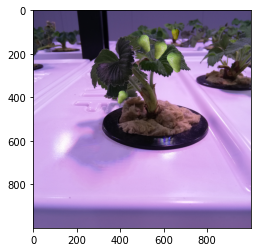

In [3]:
plt.imshow(img)

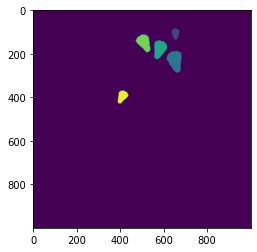

In [4]:
plt.imshow(mask)

# Beagle based MRCNN

In [5]:
dataset_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Data/Oganes/'
weights_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/MRCNN/mask_rcnn_coco.h5'
script_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/fine-tune-MaskRcnn/beagle.py'

In [6]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

In [7]:
ROOT_DIR = os.path.abspath('drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Mask-RCNN-leekunhee/')
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs_Oganes")
COCO_WEIGHTS_PATH = weights_dir

sys.path.append(ROOT_DIR)

from mrcnn.config import Config
from mrcnn import model as modellib,utils

## Training

In [8]:
!ls 'drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Data/Oganes/train/img/' | wc -l

1356


In [10]:
from tqdm import tqdm

class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "strawberry"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + beagle

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9


############################################################
#  Dataset
############################################################

class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """Load the beagle dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("strawberry", 1, "strawberry")

        # Train or validation dataset?
        assert subset in ["train", "test"]
        dataset_dir = os.path.join(dataset_dir, subset)

        for index_file,filename in tqdm(enumerate(os.listdir(os.path.join(dataset_dir,'img')))):
            image_path = os.path.join(dataset_dir, 'img' ,filename)
            mask_path= os.path.join(dataset_dir, 'label',filename)
            image = skimage.io.imread(image_path)
            #image = skimage.io.imread(image_path,plugin='matplotlib')
            #image=np.asarray(Image.open(image_path))
            #mask=np.ones_like(image)
            #mask= skimage.io.imread(mask_path)
            mask=np.load(mask_path)
            height, width = image.shape[:2]
            self.add_image(
                "strawberry",  ## for a single class just add the name here
                image_id=filename,  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=mask)

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a beagle dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "strawberry":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask_image = info["polygons"]
        detected_ids=np.unique(mask_image)[1:]

        mask = np.zeros([info["height"], info["width"], len(detected_ids)],
                        dtype=np.uint8)

        for i,id in enumerate(detected_ids):
            mask[:,:,i][mask_image==id]=1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "strawberry":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)


from tensorflow.keras.callbacks import LambdaCallback
Checkpoints_Folder='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Data/Checkpoints/'
def on_epoch_end(epoch=0, logs=''):
    Model_folder=Checkpoints_Folder+'/Model_epoch_{}.h5'.format(epoch)
    model.save_weights(Model_folder)

checkpoint_callback=LambdaCallback(on_epoch_end=on_epoch_end)

def train(model,config):
    """Train the model."""
    # Training dataset.
    dataset_train = CustomDataset()
    dataset_train.load_custom(dataset_dir, "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = CustomDataset()
    dataset_val.load_custom(dataset_dir, "test")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=30,
                layers='heads')
    



def color_splash(image, mask):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]

    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    # We're treating all instances as one, so collapse the mask into one layer
    mask = (np.sum(mask, -1, keepdims=True) >= 1)
    # Copy color pixels from the original color image where mask is set
    if mask.shape[0] > 0:
        splash = np.where(mask, image, gray).astype(np.uint8)
    else:
        splash = gray
    return splash


def detect_and_color_splash(model, image_path=None, video_path=None):
    assert image_path or video_path

    # Image or video?
    if image_path:
        # Run model detection and generate the color splash effect
        print("Running on {}".format(args.image))
        # Read image
        image = skimage.io.imread(args.image)
        # Detect objects
        r = model.detect([image], verbose=1)[0]
        # Color splash
        splash = color_splash(image, r['masks'])
        # Save output
        file_name = "splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
        skimage.io.imsave(file_name, splash)
    elif video_path:
        import cv2
        # Video capture
        vcapture = cv2.VideoCapture(video_path)
        width = int(vcapture.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(vcapture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = vcapture.get(cv2.CAP_PROP_FPS)

        # Define codec and create video writer
        file_name = "splash_{:%Y%m%dT%H%M%S}.avi".format(datetime.datetime.now())
        vwriter = cv2.VideoWriter(file_name,
                                  cv2.VideoWriter_fourcc(*'MJPG'),
                                  fps, (width, height))

        count = 0
        success = True
        while success:
            print("frame: ", count)
            # Read next image
            success, image = vcapture.read()
            if success:
                # OpenCV returns images as BGR, convert to RGB
                image = image[..., ::-1]
                # Detect objects
                r = model.detect([image], verbose=0)[0]
                # Color splash
                splash = color_splash(image, r['masks'])
                # RGB -> BGR to save image to video
                splash = splash[..., ::-1]
                # Add image to video writer
                vwriter.write(splash)
                count += 1
        vwriter.release()
    print("Saved to ", file_name)

In [12]:
    command='train'

    if command == "train":
        config = CustomConfig()
    else:
        class InferenceConfig(CustomConfig):
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
            GPU_COUNT = 1
            IMAGES_PER_GPU = 1
        config = InferenceConfig()
    config.display()

    # Create model
    if command == "train":
        model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=DEFAULT_LOGS_DIR)
    else:
        model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir=DEFAULT_LOGS_DIR)

    weights_path = COCO_WEIGHTS_PATH

    # Load weights
    print("Loading weights ", weights_path)
    
    # Exclude the last layers because they require a matching
    # number of classes
    model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])

    # Train or evaluate
    if command == "train":
        train(model,config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

KeyboardInterrupt: ignored

In [20]:
mask.shape

(1000, 1000)

In [21]:
np.unique(mask)

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [25]:
dataset_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Data/Oganes/'
weights_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/MRCNN/mask_rcnn_coco.h5'
script_dir='drive/MyDrive/Agrohack/Dataset_Mask_RCNN/fine-tune-MaskRcnn/beagle.py'

In [23]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

In [24]:
ROOT_DIR = os.path.abspath('drive/MyDrive/Agrohack/Dataset_Mask_RCNN/Mask-RCNN-leekunhee/')
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs_Oganes")
COCO_WEIGHTS_PATH = weights_dir

sys.path.append(ROOT_DIR)

from mrcnn.config import Config
from mrcnn import model as modellib,utils

# Generate dataset

In [13]:
!ls $Folder

Data  NNs  Packages
